In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.test.is_built_with_cuda():
    print("TensorFlow is built with CUDA (GPU support).")
else:
    print("TensorFlow is NOT built with CUDA. GPU will not be used.")

# Check the GPU device name
if len(tf.config.experimental.list_physical_devices('GPU')) > 0:
    print("GPU Device Name:", tf.config.experimental.list_physical_devices('GPU')[0])

Num GPUs Available:  1
TensorFlow is built with CUDA (GPU support).
GPU Device Name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
# Uninstall existing TensorFlow and Keras to ensure a clean slate
!pip uninstall -y tensorflow keras
!pip uninstall -y tensorflow keras tf-keras tensorflow-decision-forests tensorflow-text # Uninstall any conflicting versions

# Install the desired, compatible versions
!pip install tensorflow==2.18.0
!pip install tf-keras~=2.18.0
!pip install tensorflow-decision-forests==1.11.0
!pip install tensorflow-text==2.18.1

# Import and check the versions
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.10.0
Uninstalling keras-3.10.0:
  Successfully uninstalled keras-3.10.0
Found existing installation: tf_keras 2.18.0
Uninstalling tf_keras-2.18.0:
  Successfully uninstalled tf_keras-2.18.0
Found existing installation: tensorflow_decision_forests 1.11.0
Uninstalling tensorflow_decision_forests-1.11.0:
  Successfully uninstalled tensorflow_decision_forests-1.11.0
Found existing installation: tensorflow-text 2.18.1
Uninstalling tensorflow-text-2.18.1:
  Successfully uninstalled tensorflow-text-2.18.1
  Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.4 MB)
Using cached keras-3.10.0-py3-none-any.whl (1.4 MB)
ERROR: pi

Read Data

**Data Cleaning & Transformation (CRISP-DM: Data Cleaning, Data Transformation)**

1.Inspect Image Properties: Iterate through the images in your no and yes (or equivalent) folders. For a brain tumor detection project, you'll likely have images representing "tumor present" and "no tumor present."

2.Check Sizes and Formats: Are all images the same size? If not, you'll need to resize them to a uniform dimension for your neural network. Are they all JPGs, or are there other formats (PNG, etc.)?

3.Check for Corrupted Images: Some image files might be corrupted and won't open. Your code should handle these errors gracefully.

Image Preprocessing:

Resizing: Deep Learning models usually require input images of a fixed size (e.g., 224x224, 256x256). You'll need to resize all images to this common dimension.

Normalization: Pixel values in images typically range from 0-255. For neural networks, it's common practice to normalize these values to a smaller range, often 0-1 (by dividing by 255.0) or -1 to 1.

Data Augmentation (Optional but Recommended):

To prevent overfitting and improve model generalization, especially with limited datasets, you can apply data augmentation techniques (e.g., rotation, flipping, zooming, shifting). This artificially expands your dataset.

In [ ]:
# Data Processing
import os # Import the os module
from PIL import Image # Import the Image module from PIL
import numpy as np # Import numpy
from sklearn.model_selection import train_test_split # Import train_test_split
import tensorflow as tf # Import tensorflow
from google.colab import drive # Import drive to mount Google Drive


# Redefine paths if necessary based on your actual /content structure
no_tumor_path = '/content/drive/MyDrive/NN Dataset/no'
yes_tumor_path = '/content/drive/MyDrive/NN Dataset/yes'

# Define target image size and batch size again if not already defined in the current cell's context
TARGET_SIZE = (128, 128) # Define if not in current scope
BATCH_SIZE = 128 # Define if not in current scope

# Lists to store processed images and their labels
data = []
labels = [] # 0 for 'no_tumor', 1 for 'yes_tumor'

print("--- Starting Data Cleaning & Transformation (Reading new paths) ---")

# --- CRISP-DM: Data Cleaning (Image Loading and Preprocessing) ---
# Load and preprocess images from 'no_tumor' folder (label 0)
print(f"\nProcessing images from 'no tumor' folder: {no_tumor_path}")
if os.path.exists(no_tumor_path):
    num_no_tumor_images = 0
    for filename in os.listdir(no_tumor_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(no_tumor_path, filename)
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize(TARGET_SIZE)
                img_array = np.array(img) / 255.0 # Normalize pixel values to 0-1

                if img_array.shape == (TARGET_SIZE[0], TARGET_SIZE[1], 3):
                    data.append(img_array)
                    labels.append(0)
                    num_no_tumor_images += 1
                else:
                    print(f"Warning: Skipping {img_path} due to unexpected shape: {img_array.shape}")
            except Exception as e:
                print(f"Error: Could not process image {img_path}: {e}")
    print(f"Successfully loaded {num_no_tumor_images} images from '{no_tumor_path}'.")
else:
    print(f"Error: 'no tumor' folder '{no_tumor_path}' not found. Check path and contents.")


# Load and preprocess images from 'yes_tumor' folder (label 1)
print(f"\nProcessing images from 'yes tumor' folder: {yes_tumor_path}")
if os.path.exists(yes_tumor_path):
    num_yes_tumor_images = 0
    for filename in os.listdir(yes_tumor_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(yes_tumor_path, filename)
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize(TARGET_SIZE)
                img_array = np.array(img) / 255.0

                if img_array.shape == (TARGET_SIZE[0], TARGET_SIZE[1], 3):
                    data.append(img_array)
                    labels.append(1)
                    num_yes_tumor_images += 1
                else:
                    print(f"Warning: Skipping {img_path} due to unexpected shape: {img_array.shape}")
            except Exception as e:
                print(f"Error: Could not process image {img_path}: {e}")
    print(f"Successfully loaded {num_yes_tumor_images} images from '{yes_tumor_path}'.")
else:
    print(f"Error: 'yes tumor' folder '{yes_tumor_path}' not found. Check path and contents.")

# Convert lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

print(f"\n--- Data Loading Summary (from new paths) ---")
print(f"Total images loaded: {len(data)}")

if len(data) > 0:
    print(f"Shape of image data: {data.shape}")
    print(f"Shape of labels: {labels.shape}")

    # --- CRISP-DM: Data Understanding (Check Class Distribution) ---
    unique_labels, counts = np.unique(labels, return_counts=True)
    class_distribution = dict(zip(unique_labels, counts))
    print(f"\nClass Distribution (0: No Tumor, 1: Yes Tumor): {class_distribution}")
    if 0 in class_distribution and 1 in class_distribution:
        if class_distribution[0] != class_distribution[1]:
            print("Note: The dataset is imbalanced. This might affect model training and evaluation.")
            print("Consider using techniques like oversampling, undersampling, or class weighting during training.")
    else:
        print("Warning: One or both classes might be missing from the loaded data.")

    # --- CRISP-DM: Data Transformation (Splitting Data) ---
    print("\n--- Splitting Data into Training, Validation, and Test Sets ---")
    # Ensure there's enough data for splitting
    if len(data) >= 2: # Need at least two samples to split
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            data, labels, test_size=0.2, random_state=42, stratify=labels
        )
        print(f"Initial split: {len(X_train_val)} for Train+Validation, {len(X_test)} for Test.")

        # Ensure there's enough data in the train_val set for the second split
        if len(X_train_val) >= 2:
            X_train, X_val, y_train, y_val = train_test_split(
                X_train_val, y_train_val, test_size=0.25, random_state=49, stratify=y_train_val # Changed random_state to 49 for the second split to avoid potential issues with same seed
            )
            print(f"Final split: {len(X_train)} for Training, {len(X_val)} for Validation, {len(X_test)} for Testing.")

            print(f"\nTraining data shape: {X_train.shape}")
            print(f"Validation data shape: {X_val.shape}")
            print(f"Testing data shape: {X_test.shape}")
            print(f"Training labels shape: {y_train.shape}")
            print(f"Validation labels shape: {y_val.shape}")
            print(f"Testing labels shape: {y_test.shape}")

            # --- NEW: Convert NumPy arrays to tf.data.Dataset objects for optimized input ---
            print("\n--- Converting data to tf.data.Dataset for optimized pipeline ---")
            AUTOTUNE = tf.data.AUTOTUNE # Automatically tune buffer sizes

            # Create datasets from your NumPy arrays
            train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
            val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
            test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)) # Create for testing as well if you like

            # Apply shuffling, batching, caching, and prefetching for performance
            # Shuffling is only for training data to improve generalization
            train_dataset = train_dataset.shuffle(buffer_size=1024) # Shuffle buffer size
            train_dataset = train_dataset.batch(BATCH_SIZE).cache().prefetch(buffer_size=AUTOTUNE)

            val_dataset = val_dataset.batch(BATCH_SIZE).cache().prefetch(buffer_size=AUTOTUNE)
            test_dataset = test_dataset.batch(BATCH_SIZE).cache().prefetch(buffer_size=AUTOTUNE) # For evaluation later

            print(f"tf.data.Dataset objects created for training, validation, and testing.")
            print("These datasets are now optimized for performance.")

        else:
             print("Not enough data in the train+validation set to perform the second split.")
    else:
         print("Not enough data loaded to perform train/validation/test split.")

else:
    print("No images were loaded. Please review the file paths and ensure images are present.")

print("\n--- Data Cleaning & Transformation Complete (from new paths) ---")

--- Starting Data Cleaning & Transformation (Reading new paths) ---

Processing images from 'no tumor' folder: /content/drive/MyDrive/NN Dataset/no
Successfully loaded 1500 images from '/content/drive/MyDrive/NN Dataset/no'.

Processing images from 'yes tumor' folder: /content/drive/MyDrive/NN Dataset/yes
Successfully loaded 1500 images from '/content/drive/MyDrive/NN Dataset/yes'.

--- Data Loading Summary (from new paths) ---
Total images loaded: 3000
Shape of image data: (3000, 128, 128, 3)
Shape of labels: (3000,)

Class Distribution (0: No Tumor, 1: Yes Tumor): {np.int64(0): np.int64(1500), np.int64(1): np.int64(1500)}

--- Splitting Data into Training, Validation, and Test Sets ---
Initial split: 2400 for Train+Validation, 600 for Test.
Final split: 1800 for Training, 600 for Validation, 600 for Testing.

Training data shape: (1800, 128, 128, 3)
Validation data shape: (600, 128, 128, 3)
Testing data shape: (600, 128, 128, 3)
Training labels shape: (1800,)
Validation labels shape:

Modeling (CRISP-DM: Modeling)

Choose a Deep Learning Model (ANN): Since your project specifies Deep Learning (DL) methods in Artificial Neural Network (ANN), you'll typically use a Convolutional Neural Network (CNN) for image classification.

Simple CNN Architecture: Start with a relatively simple CNN.
Transfer Learning (Recommended): For medical image analysis and limited datasets, using pre-trained models (like VGG16, ResNet, Inception, MobileNet) and fine-tuning them is highly effective. This is known as transfer learning. You'd typically load the pre-trained weights and add your own classification layers on top.

In [ ]:
# Modeling
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # Make sure both are imported
from tensorflow.keras import regularizers # Import regularizers for L2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator
# from tensorflow.keras.applications import VGG16 # For transfer learning example

# Check if data was loaded and split successfully
if 'X_train' in locals() and X_train.size > 0:
    # Define your CNN model with L2 regularization
    model = Sequential([
    # Convolutional Layer 1 with L2 regularization
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:],
           kernel_regularizer=regularizers.l2(0.01)), # L2 regularization applied to weights
    MaxPooling2D((2, 2)),

    # Convolutional Layer 2 (you can add L2 here too if desired)
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Convolutional Layer 3 (you can add L2 here too if desired)
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    # Dense Layer with L2 regularization
    Dense(128, activation='relu',
          kernel_regularizer=regularizers.l2(0.01)), # L2 regularization applied to weights\
    ### DROP VALUE ####
    Dropout(0.6),

    # Output Layer
    Dense(1, activation='sigmoid')
])


    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy', # For binary classification
                  metrics=['accuracy'])

    # Display model summary
    model.summary()

    early_stopping = EarlyStopping(
        monitor='val_loss',           # Monitor validation loss
        patience=10,                   # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True     # Restore model weights from the epoch with the best value of the monitored quantity
    )
    reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # Monitor validation loss
    factor=0.5,         # Reduce learning rate by a factor of 0.5 (halve it)
    patience=5,         # Reduce LR after 5 epochs with no improvement in val_loss
    min_lr=0.000001,    # Don't let learning rate go below this
    verbose=1           # Print a message when LR is reduced
    )

    # Set up data augmentation
    datagen = ImageDataGenerator(
        rotation_range=15,      # Random rotations up to 15 degrees
        zoom_range=0.1,         # Random zoom up to 10%
        width_shift_range=0.1,  # Random horizontal shifts up to 10%
        height_shift_range=0.1, # Random vertical shifts up to 10%
        horizontal_flip=True,   # Random horizontal flips
        vertical_flip=False     # Generally not recommended for brain images
    )

    # Fit the data generator on your training data
    datagen.fit(X_train)

    # Train the model using the data generator
    print("\nStarting model training with Data Augmentation...")
    history = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                        steps_per_epoch=len(X_train) // BATCH_SIZE, # Number of batches per epoch
                        epochs=30, # You might need more epochs with augmentation
                        validation_data=(X_val, y_val), # Use your validation data here!
                        callbacks=[early_stopping, reduce_lr]) # Add reduce_lr callback here

    print("\nModel training complete.")
else:
    print("Model training skipped: No data loaded or split.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)


Starting model training with Data Augmentation...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 774ms/step - accuracy: 0.5336 - loss: 2.4845 - val_accuracy: 0.7450 - val_loss: 1.0738 - learning_rate: 0.0010
Epoch 2/30
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7266 - loss: 1.0862

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7266 - loss: 1.0862 - val_accuracy: 0.7450 - val_loss: 1.0400 - learning_rate: 0.0010
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 568ms/step - accuracy: 0.6749 - loss: 0.9859 - val_accuracy: 0.7150 - val_loss: 0.8887 - learning_rate: 0.0010
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6484 - loss: 0.8271 - val_accuracy: 0.7483 - val_loss: 0.8261 - learning_rate: 0.0010
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 459ms/step - accuracy: 0.6390 - loss: 0.8520 - val_accuracy: 0.7350 - val_loss: 0.7298 - learning_rate: 0.0010
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7188 - loss: 0.7658 - val_accuracy: 0.7333 - val_loss: 0.7168 - learning_rate: 0.0010
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 484ms/step - accuracy: 0.7064 - loss: 0.7228 - val_accuracy: 0.7500 - val_loss: 0.6156 - learning_rate: 0.0010
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6250 - loss: 0.7076 - val_accuracy: 

Evaluation (CRISP-DM: Evaluation)

Assess Model Performance: After training, you need to evaluate how well your model performs on unseen data (your test set).

Metrics:

Accuracy: Percentage of correctly classified images.
Precision, Recall, F1-score: Especially important for imbalanced datasets (e.g., if you have many more "no tumor" than "yes tumor" images).
Confusion Matrix: Helps visualize where your model is making mistakes (false positives, false negatives).
ROC Curve and AUC: Useful for binary classification problems to evaluate the trade-off between true positive rate and false positive rate.


Test Loss: 0.5051
Test Accuracy: 0.7917
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.84      0.72      0.77       300
   Yes Tumor       0.75      0.87      0.81       300

    accuracy                           0.79       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.79      0.79       600



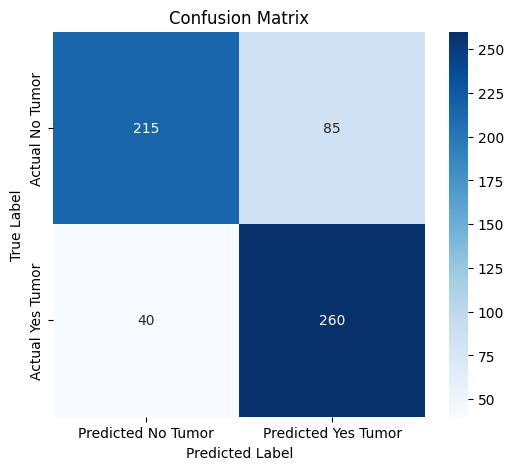

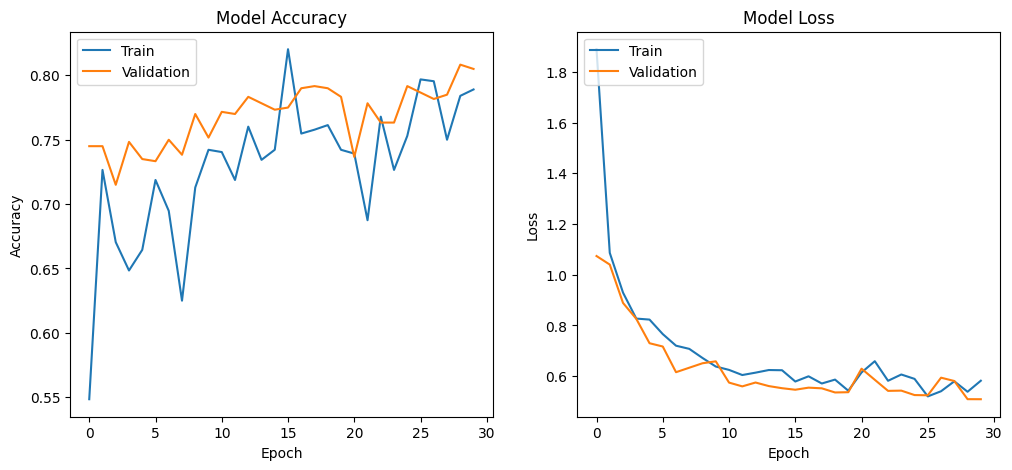

In [ ]:
# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

if 'model' in locals() and 'X_test' in locals() and X_test.size > 0:
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nTest Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    # Make predictions on the test set
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int) # Convert probabilities to binary predictions (0 or 1)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Tumor', 'Yes Tumor']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted No Tumor', 'Predicted Yes Tumor'],
                yticklabels=['Actual No Tumor', 'Actual Yes Tumor'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plot training history (accuracy and loss over epochs)
    if 'history' in locals():
        plt.figure(figsize=(12, 5))

        # Plot training & validation accuracy values
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(['Train', 'Validation'], loc='upper left')

        # Plot training & validation loss values
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()
else:
    print("Model evaluation skipped: No model or test data available.")


Test Loss: 0.5051
Test Accuracy: 0.7917
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.84      0.72      0.77       300
   Yes Tumor       0.75      0.87      0.81       300

    accuracy                           0.79       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.79      0.79       600



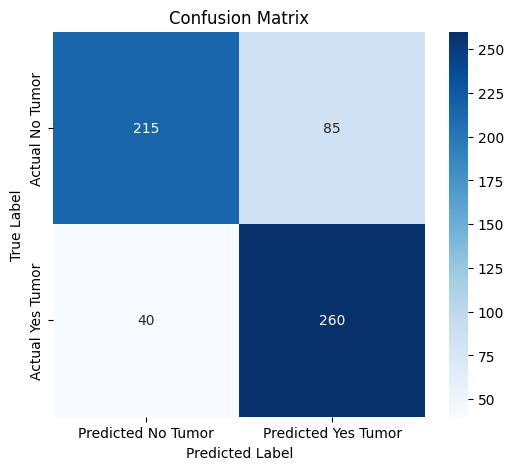

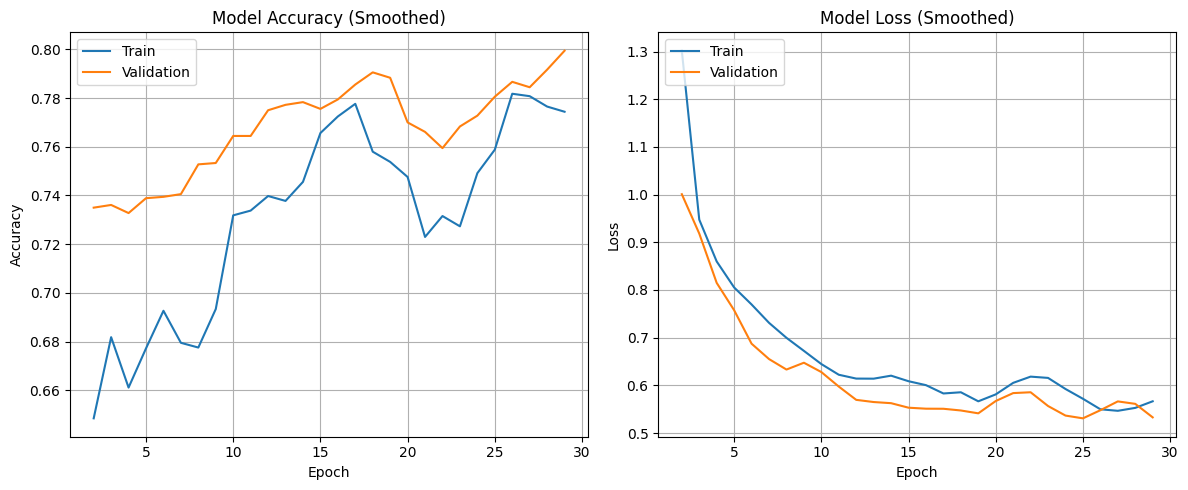

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Make sure numpy is imported for smoothing functions

if 'model' in locals() and 'X_test' in locals() and X_test.size > 0:
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nTest Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    # Make predictions on the test set
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int) # Convert probabilities to binary predictions (0 or 1)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Tumor', 'Yes Tumor']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted No Tumor', 'Predicted Yes Tumor'],
                yticklabels=['Actual No Tumor', 'Actual Yes Tumor'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plot training history (accuracy and loss over epochs)
    if 'history' in locals():
        # --- START OF ADJUSTMENT FOR SMOOTHING ---

        # Define a window size for the moving average
        # Experiment with this value:
        # - A smaller window (e.g., 2 or 3) will provide light smoothing.
        # - A larger window (e.g., 5, 7, or 10) will result in much smoother curves,
        #   but might slightly delay the apparent trend changes.
        window_size = 3 # You can change this value

        # Function to apply a simple moving average
        def simple_moving_average(data, window_size):
            if len(data) < window_size:
                return data # Cannot smooth if data is smaller than window
            # Uses convolution to compute the moving average efficiently
            return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

        # Get the raw history data
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        # Apply smoothing
        smoothed_acc = simple_moving_average(acc, window_size)
        smoothed_val_acc = simple_moving_average(val_acc, window_size)
        smoothed_loss = simple_moving_average(loss, window_size)
        smoothed_val_loss = simple_moving_average(val_loss, window_size)

        # Since 'mode=valid' in np.convolve shortens the array by (window_size - 1)
        # from the start, we need to adjust the x-axis (epochs) accordingly.
        # The smoothed data will start from (window_size - 1) epoch index.
        epochs_smoothed = range(window_size - 1, len(acc))

        # --- END OF ADJUSTMENT FOR SMOOTHING ---

        plt.figure(figsize=(12, 5))

        # Plot training & validation accuracy values (SMOOTHED)
        plt.subplot(1, 2, 1)
        plt.plot(epochs_smoothed, smoothed_acc) # Use smoothed data and adjusted epochs
        plt.plot(epochs_smoothed, smoothed_val_acc) # Use smoothed data and adjusted epochs
        plt.title('Model Accuracy (Smoothed)') # Added 'Smoothed' to title
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.grid(True) # Added grid for better readability

        # Plot training & validation loss values (SMOOTHED)
        plt.subplot(1, 2, 2)
        plt.plot(epochs_smoothed, smoothed_loss) # Use smoothed data and adjusted epochs
        plt.plot(epochs_smoothed, smoothed_val_loss) # Use smoothed data and adjusted epochs
        plt.title('Model Loss (Smoothed)') # Added 'Smoothed' to title
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.grid(True) # Added grid for better readability

        plt.tight_layout() # Adjusts plot parameters for a tight layout
        plt.show()
    else:
        print("Training history ('history' object) not found. Cannot plot accuracy and loss curves.")
else:
    print("Model evaluation skipped: No model or test data available.")

In [ ]:
from IPython.display import display, clear_output
from ipywidgets import FileUpload, Button, Output, VBox, HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import io

# Create widgets
upload_widget = FileUpload(
    accept='image/*',  # Accept any image type
    multiple=False  # Allow only one file upload at a time
)

predict_button = Button(description="Predict")
output_widget = Output()
instructions = HTML(value="<h3>Upload an image for prediction:</h3>")

# Define the prediction function
def predict_image(image_bytes):
    # Ensure model and TARGET_SIZE are defined in the environment
    # Explicitly refer to global variables
    global model
    global TARGET_SIZE

    if 'model' not in globals() or model is None: # Check in globals() and if model is not None
        with output_widget:
            print("Model not trained or loaded properly.")
        return
    if 'TARGET_SIZE' not in globals():
         with output_widget:
            print("TARGET_SIZE not defined.")
            return


    try:
        # Load and preprocess the uploaded image
        img = Image.open(io.BytesIO(image_bytes)).convert('RGB')
        img = img.resize(TARGET_SIZE)
        img_array = np.array(img) / 255.0 # Normalize
        img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

        # Make prediction
        prediction = model.predict(img_array)
        probability = prediction[0][0] # Get the probability for the 'yes tumor' class

        # Determine the predicted class
        predicted_class = "Yes Tumor" if probability > 0.5 else "No Tumor"
        # Confidence calculation can be improved for binary classification
        # It's usually the probability of the predicted class
        confidence = probability if predicted_class == "Yes Tumor" else (1 - probability)

        # Display the image and prediction
        clear_output(wait=True)
        with output_widget:
            plt.imshow(img)
            plt.title(f"Prediction: {predicted_class} (Confidence: {confidence:.2f})") # Added "Confidence: " for clarity
            plt.axis('off') # Hide axes
            plt.show()

    except Exception as e:
        with output_widget:
            print(f"Error processing image or making prediction: {e}")
            # Optionally print the full traceback for debugging
            # import traceback
            # print(traceback.format_exc())


# Define the event handler for the button click
def on_predict_button_click(b):
    with output_widget:
        clear_output(wait=True) # Clear previous output
        if upload_widget.value:
            # Get the uploaded file content
            # The file data is in a dictionary keyed by filename
            uploaded_file_dict = upload_widget.value
            if uploaded_file_dict: # Check if dictionary is not empty
                # Get the first (and only) file's content
                first_filename = list(uploaded_file_dict.keys())[0]
                image_content = uploaded_file_dict[first_filename]['content']
                predict_image(image_content)
            else:
                 print("No file content received.") # Handle case where value is not empty but dict is
        else:
            print("Please upload an image first.")

# Link the button click to the handler function
predict_button.on_click(on_predict_button_click)

# Arrange widgets in a VBox and display
test_window = VBox([instructions, upload_widget, predict_button, output_widget])
display(test_window)